In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import json

In [2]:
# TN Shapefile

df = gpd.read_file(r'C:\Users\Ryzen\Downloads\tamilnadu_district.json')
df.head()

,cartodb_id,censuscode,dt_cen_cd,st_cen_cd,st_nm,district,geometry
0,175,610,9,33,Tamil Nadu,Erode,"(POLYGON ((77.499799 11.114427, 77.499799 11.1..."
1,449,621,20,33,Tamil Nadu,Pudukkottai,"(POLYGON ((78.736733 10.670196, 78.738422 10.6..."
2,535,622,21,33,Tamil Nadu,Sivaganga,"(POLYGON ((78.491328 10.388545, 78.49709900000..."
3,563,620,19,33,Tamil Nadu,Thanjavur,"(POLYGON ((79.52557899999999 11.178869, 79.530..."
4,567,602,1,33,Tamil Nadu,Thiruvallur,"(POLYGON ((80.308789 13.468258, 80.31026799999..."


In [ ]:
# Data for Infected cases (Source: covid19india.org)

df_raw = pd.read_json(r"C:\Users\Ryzen\Downloads\raw_data.json")

In [8]:
# Extracting data for TN and counting district-wise

df_tn = df_raw[df_raw['statecode'] == 'TN']
df_count = df_tn.groupby(['detecteddistrict']).size().reset_index(name='counts')

In [10]:
# Merging the district-wise counts to the shapefile dataframe (shapefile should be the left)

df_total = df.set_index('district').join(df_count.set_index('detecteddistrict'))
df_total['counts'] = df_total['counts'].fillna(0)

(76.0274408, 80.5519652, 7.8035817000000005, 13.8374183)

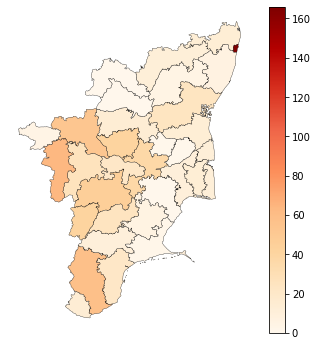

In [11]:
# Plotting the map

variable = 'counts'

fig, ax = plt.subplots(figsize=(6,6))
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=min(df_total['counts']), vmax=max(df_total['counts'])))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

df_total.plot(column=variable, cmap='OrRd', ax=ax, linewidth=0.3, edgecolor='k')
plt.axis('off')

In [88]:
"""Mobility data"""

# Importing FB data for Mar 30 and extracting datapoints for TN

df = pd.read_csv("../Map_2020-03-30.csv")

# Dropping metrics and removing redundancies
df_min = df.drop(['metric_name', 'metric_value'], axis=1)
df_min.drop_duplicates(inplace=True)

del df

df_tn_start = df_min[(df_min['country'] == 'IN') & (df_min['start_name_stack'].str.contains(r"^Tamil"))]
df_tn_end = df_min[(df_min['country'] == 'IN') & (df_min['end_name_stack'].str.contains(r"^Tamil"))]

In [116]:
# Extracting district names from the TN datapoints

districts = []

for name in df_tn_start['end_name_stack'].values:
    districts.append(name.split('//')[1].strip())

In [120]:
# Counting the number of occurrences district-wise

counts_mob = {key: 0 for key in districts}

for _, row in df_tn_start.iterrows():
    name = row['end_name_stack'].split('//')[1].strip()
    if name in counts_mob.keys():
        counts_mob[name] += 1

In [121]:
counts_mob_df = pd.DataFrame.from_dict(counts_mob, orient='index', columns=['Counts']).reset_index()
counts_mob_df.head()

,index,Counts
0,Kancheepuram,227
1,Pudukkottai,206
2,Dharmapuri,125
3,Ramanathapuram,104
4,Thoothukkudi,148


In [142]:
# Merging the district-wise counts to the shapefile dataframe (shapefile should be the left)

df_total_mob = df.set_index('district').join(counts_mob_df.set_index('index'))

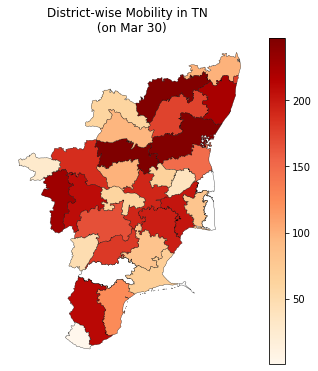

In [155]:
# Plotting the map

variable = 'Counts'

fig, ax = plt.subplots(figsize=(6,6))
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=min(counts_mob_df['Counts']), vmax=max(counts_mob_df['Counts'])))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

df_total_mob.plot(column=variable, cmap='OrRd', ax=ax, linewidth=0.3, edgecolor='k')
plt.axis('off')
plt.title('District-wise Mobility in TN \n (on Mar 30)')
plt.savefig('TN-Mobility-On-Mar30.png', dpi=300, bbox_inches='tight')